In [5]:
# Remember: library imports are ALWAYS at the top of the script, no exceptions!
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Seeting seaborn style
sns.set()

In [6]:
df_train = pd.read_excel(r'Train.xlsx')

In [7]:
df_train.head()

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income
0,12486,Mr. Adam Glover,"July 1,2003",Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1
1,12487,Mr. Cameron McDonald,"January 25,2006",Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1
2,12488,Mr. Keith Davidson,"May 10,2009",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,0,2321,1
3,12489,Mr. Alexander Gill,"March 25,1985",Europe,Married,Wife,Northbury,High School - 2nd Cycle,11,Private Sector - Services,Security,37,5395,0,1
4,12490,Mr. Neil Piper,"May 29,2015",Europe,Single,Other Family,Northbury,PhD,21,Self-Employed (Individual),Professor,45,0,0,1


In [8]:
df_test = pd.read_excel(r'Test.xlsx')

In [9]:
df_test.head()

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price
0,34886,Mr. Dan Kerr,"May 13,2012",Europe,Married,Wife,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Sales,40,0,0
1,34887,Miss Olivia Grant,"August 9,2014",Europe,Single,Other Family,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Professor,36,0,0
2,34888,Mr. Trevor Simpson,"May 23,2020",Europe,Divorced,Other Family,Northbury,Professional School + PostGraduation,13,Private Sector - Services,Management,50,12940,0
3,34889,Mr. David Clark,"April 15,2016",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Professor,48,0,1827
4,34890,Mr. Gavin Lambert,"April 22,2011",Europe,Married,Wife,Watford,Bachelors,15,Public Sector - Others,Professor,45,0,0


In [10]:
df_train["Base Area"].unique()

array(['Northbury', 'Auchenshuggle', 'Sharnwick', 'Laewaes',
       'MillerVille', '?', 'Fanfoss', 'Wigston', "Knife's Edge",
       'Aerilon', 'Watford', 'Lanercost', 'Bellmoral', 'Marnmouth',
       'Bellenau', 'Butterpond', 'Laenteglos', 'Tranmere', 'Eelry',
       'Alverton', 'Pran', 'Willesden', "King's Watch", 'Kald',
       'Kirkwall', "Fool's March", 'Middlesbrough', 'Orilon',
       'Aroonshire', 'Aberuthven', 'Sharpton', 'Lewes', 'Mensfield',
       'Cherrytown', 'Redwick Bush', 'Drumchapel', 'Carlisle',
       'Conriston', 'Woodpine', 'Ironforge'], dtype=object)

In [11]:
df_train[["Role","Base Area"]][df_train["Role"].isnull()]

,Role,Base Area


In [12]:
df_train[["Employment Sector", "Role"]][df_train["Employment Sector"]==df_train["Role"]]

,Employment Sector,Role
22,?,?
25,?,?
37,?,?
43,?,?
44,?,?
...,...,...
22309,?,?
22328,?,?
22337,?,?
22339,?,?


In [13]:
df_train["Base Area"][df_train["Base Area"]=="?"]

30       ?
97       ?
214      ?
285      ?
359      ?
        ..
22047    ?
22144    ?
22242    ?
22349    ?
22373    ?
Name: Base Area, Length: 395, dtype: object

In [14]:
df_train["Lives with"].unique()

array(['Wife', 'Other Family', 'Children', 'Other relatives', 'Alone',
       'Husband'], dtype=object)

In [15]:
df_train["Years of Education"].unique()

array([13, 12, 11, 21, 15, 16, 17, 10, 18,  8,  9,  6,  4,  2])

In [16]:
df_train.groupby("Education Level")["Years of Education"].mean()

Education Level
Bachelors                               15
Bachelors + PostGraduation              16
High School + PostGraduation            13
High School - 1st Cycle                 10
High School - 2nd Cycle                 11
High School Complete                    12
Masters                                 17
Masters + PostGraduation                18
Middle School - 1st Cycle                6
Middle School - 2nd Cycle                8
Middle School Complete                   9
PhD                                     21
Preschool                                2
Primary School                           4
Professional School                     12
Professional School + PostGraduation    13
Name: Years of Education, dtype: int64

In [17]:
df_train.groupby(["Education Level","Years of Education"] )["Years of Education"].mean()

Education Level                       Years of Education
Bachelors                             15                    15
Bachelors + PostGraduation            16                    16
High School + PostGraduation          13                    13
High School - 1st Cycle               10                    10
High School - 2nd Cycle               11                    11
High School Complete                  12                    12
Masters                               17                    17
Masters + PostGraduation              18                    18
Middle School - 1st Cycle             6                      6
Middle School - 2nd Cycle             8                      8
Middle School Complete                9                      9
PhD                                   21                    21
Preschool                             2                      2
Primary School                        4                      4
Professional School                   12                    1

In [18]:
df_train["Working Hours per week"].unique()

array([40, 46, 37, 45, 30, 20, 15, 50, 60, 54, 35, 49, 75, 55, 84, 25, 24,
       48, 21, 10,  8, 38, 32,  4, 16, 70, 26, 42, 90, 18, 28, 22, 36,  7,
       14, 29, 66, 58, 65, 80, 44, 12, 72, 47, 27, 17, 99, 81, 56,  3, 52,
       43,  5, 41, 57, 63,  9,  6, 34, 98, 19, 68, 62, 51, 91, 13, 33, 67,
       39,  1, 11, 23, 88, 96, 64, 53,  2, 31, 94, 78, 92, 74, 85, 95, 73,
       89, 76, 82, 87, 86, 59, 97, 77, 61])

In [19]:
df_train["Working Hours per week"][df_train["Working Hours per week"]<=5]

130      4
746      3
826      5
1216     5
1392     5
        ..
21257    1
21347    5
21764    1
22165    5
22359    2
Name: Working Hours per week, Length: 140, dtype: int64

In [20]:
df_train["Ticket Price"][df_train["Ticket Price"]!=0]

0        2273
2        2321
41       2970
67       2432
87       2462
         ... 
22327    2339
22329    2432
22359    2234
22373    2321
22390    2339
Name: Ticket Price, Length: 1057, dtype: int64

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22400 entries, 0 to 22399
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CITIZEN_ID              22400 non-null  int64 
 1   Name                    22400 non-null  object
 2   Birthday                22400 non-null  object
 3   Native Continent        22400 non-null  object
 4   Marital Status          22400 non-null  object
 5   Lives with              22400 non-null  object
 6   Base Area               22400 non-null  object
 7   Education Level         22400 non-null  object
 8   Years of Education      22400 non-null  int64 
 9   Employment Sector       22400 non-null  object
 10  Role                    22400 non-null  object
 11  Working Hours per week  22400 non-null  int64 
 12  Money Received          22400 non-null  int64 
 13  Ticket Price            22400 non-null  int64 
 14  Income                  22400 non-null  int64 
dtypes:

In [22]:
df_train.describe(include="all")

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income
count,22400.000000,22400,22400,22400,22400,22400,22400,22400,22400.000000,22400,22400,22400.000000,22400.000000,22400.000000,22400.000000
unique,NaN,16074,11257,5,7,6,40,16,NaN,9,15,NaN,NaN,NaN,NaN
top,NaN,Mr. Christian Manning,"August 15,2025",Europe,Married,Wife,Northbury,Professional School,NaN,Private Sector - Services,Professor,NaN,NaN,NaN,NaN
freq,NaN,4,9,19111,10219,9012,20074,7232,NaN,15599,2849,NaN,NaN,NaN,NaN
mean,23685.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.173884,NaN,NaN,40.483795,1324.915357,109.145313,0.237098
std,6466.467351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.512451,NaN,NaN,12.370921,9227.771813,500.208904,0.425313
min,12486.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000
25%,18085.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,40.000000,0.000000,0.000000,0.000000
50%,23685.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.000000,NaN,NaN,40.000000,0.000000,0.000000,0.000000
75%,29285.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,45.000000,0.000000,0.000000,0.000000


In [23]:
#FUNCIONA
df_train.set_index("CITIZEN_ID", inplace=True)

In [24]:
#FUNCIONA
from datetime import datetime

df_train['Birthday']=df_train['Birthday'].map(lambda x: x.replace("February 29", "February 28"))

In [25]:
#funciona
df_train['Birthday'][df_train['Birthday'].str.contains("February 29")]

Series([], Name: Birthday, dtype: object)

In [26]:
#funciona
df_train['Birthday']=df_train['Birthday'].map(lambda x: datetime.strptime(x, " %B %d,%Y").date())

In [27]:
#funciona
df_train['Birthday']

CITIZEN_ID
12486    2003-07-01
12487    2006-01-25
12488    2009-05-10
12489    1985-03-25
12490    2015-05-29
            ...    
34881    2023-03-15
34882    2025-03-07
34883    2022-07-20
34884    2011-06-11
34885    2026-10-02
Name: Birthday, Length: 22400, dtype: object

In [28]:
#funciona
df_train['Birthday'] = pd.to_datetime(df_train['Birthday'])

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22400 entries, 12486 to 34885
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Name                    22400 non-null  object        
 1   Birthday                22400 non-null  datetime64[ns]
 2   Native Continent        22400 non-null  object        
 3   Marital Status          22400 non-null  object        
 4   Lives with              22400 non-null  object        
 5   Base Area               22400 non-null  object        
 6   Education Level         22400 non-null  object        
 7   Years of Education      22400 non-null  int64         
 8   Employment Sector       22400 non-null  object        
 9   Role                    22400 non-null  object        
 10  Working Hours per week  22400 non-null  int64         
 11  Money Received          22400 non-null  int64         
 12  Ticket Price            22400 non-null  in

In [30]:
df_train.head()

,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income
CITIZEN_ID,,,,,,,,,,,,,,
12486,Mr. Adam Glover,2003-07-01,Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1
12487,Mr. Cameron McDonald,2006-01-25,Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1
12488,Mr. Keith Davidson,2009-05-10,Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,0,2321,1
12489,Mr. Alexander Gill,1985-03-25,Europe,Married,Wife,Northbury,High School - 2nd Cycle,11,Private Sector - Services,Security,37,5395,0,1
12490,Mr. Neil Piper,2015-05-29,Europe,Single,Other Family,Northbury,PhD,21,Self-Employed (Individual),Professor,45,0,0,1


In [48]:
#Funciona
df_train=df_train.replace('?', np.nan)

In [50]:
#Funciona
df_train.describe(include='all')

,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income
count,22400,22400,22400,22400,22400,22005,22400,22400.000000,21136,21129,22400.000000,22400.000000,22400.000000,22400.000000
unique,16074,11229,5,7,6,39,16,NaN,8,14,NaN,NaN,NaN,NaN
top,Mr. Christian Manning,2025-08-15 00:00:00,Europe,Married,Wife,Northbury,Professional School,NaN,Private Sector - Services,Professor,NaN,NaN,NaN,NaN
freq,4,9,19111,10219,9012,20074,7232,NaN,15599,2849,NaN,NaN,NaN,NaN
first,NaN,1958-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2031-10-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.173884,NaN,NaN,40.483795,1324.915357,109.145313,0.237098
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.512451,NaN,NaN,12.370921,9227.771813,500.208904,0.425313
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,40.000000,0.000000,0.000000,0.000000


In [53]:
df_train.isna().sum()

Name                         0
Birthday                     0
Native Continent             0
Marital Status               0
Lives with                   0
Base Area                  395
Education Level              0
Years of Education           0
Employment Sector         1264
Role                      1271
Working Hours per week       0
Money Received               0
Ticket Price                 0
Income                       0
dtype: int64

In [56]:
target = df_train['Income']
df_train = df_train.drop(['Income'], axis=1)

In [60]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22400 entries, 12486 to 34885
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Name                    22400 non-null  object        
 1   Birthday                22400 non-null  datetime64[ns]
 2   Native Continent        22400 non-null  object        
 3   Marital Status          22400 non-null  object        
 4   Lives with              22400 non-null  object        
 5   Base Area               22005 non-null  object        
 6   Education Level         22400 non-null  object        
 7   Years of Education      22400 non-null  int64         
 8   Employment Sector       21136 non-null  object        
 9   Role                    21129 non-null  object        
 10  Working Hours per week  22400 non-null  int64         
 11  Money Received          22400 non-null  int64         
 12  Ticket Price            22400 non-null  in

In [61]:
#Define metric and non-metric datasets
metric= df_train.loc[:, np.array(df_train.dtypes=="int64")]
non_metric= df_train.loc[:,(df_train.columns=="Birthday") | (np.array(df_train.dtypes=="object"))]

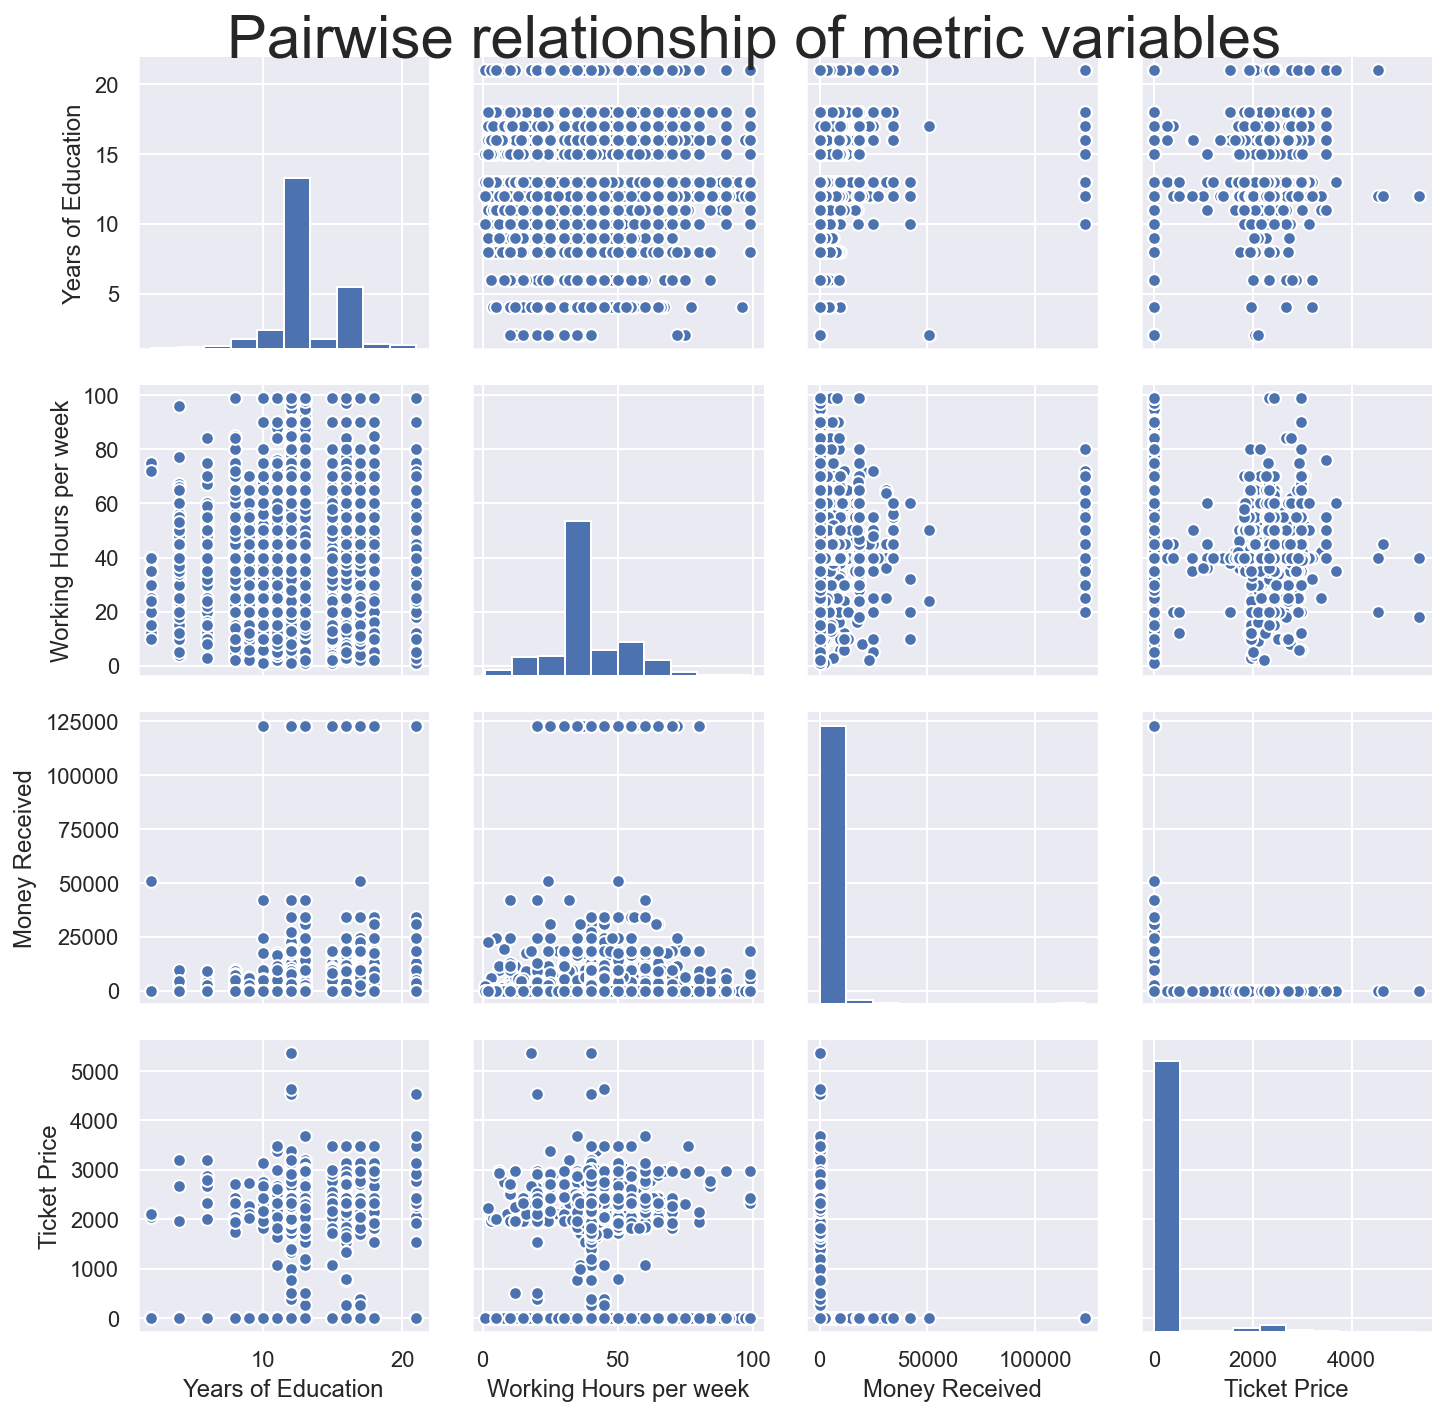

In [67]:
sns.set()

# Setting pairgrid
g = sns.PairGrid(metric)

# Populating pairgrid
mdg = g.map_diag(plt.hist, edgecolor="w")
mog = g.map_offdiag(plt.scatter, edgecolor="w", s=40)
    
# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise relationship of metric variables", fontsize=30)

plt.show()

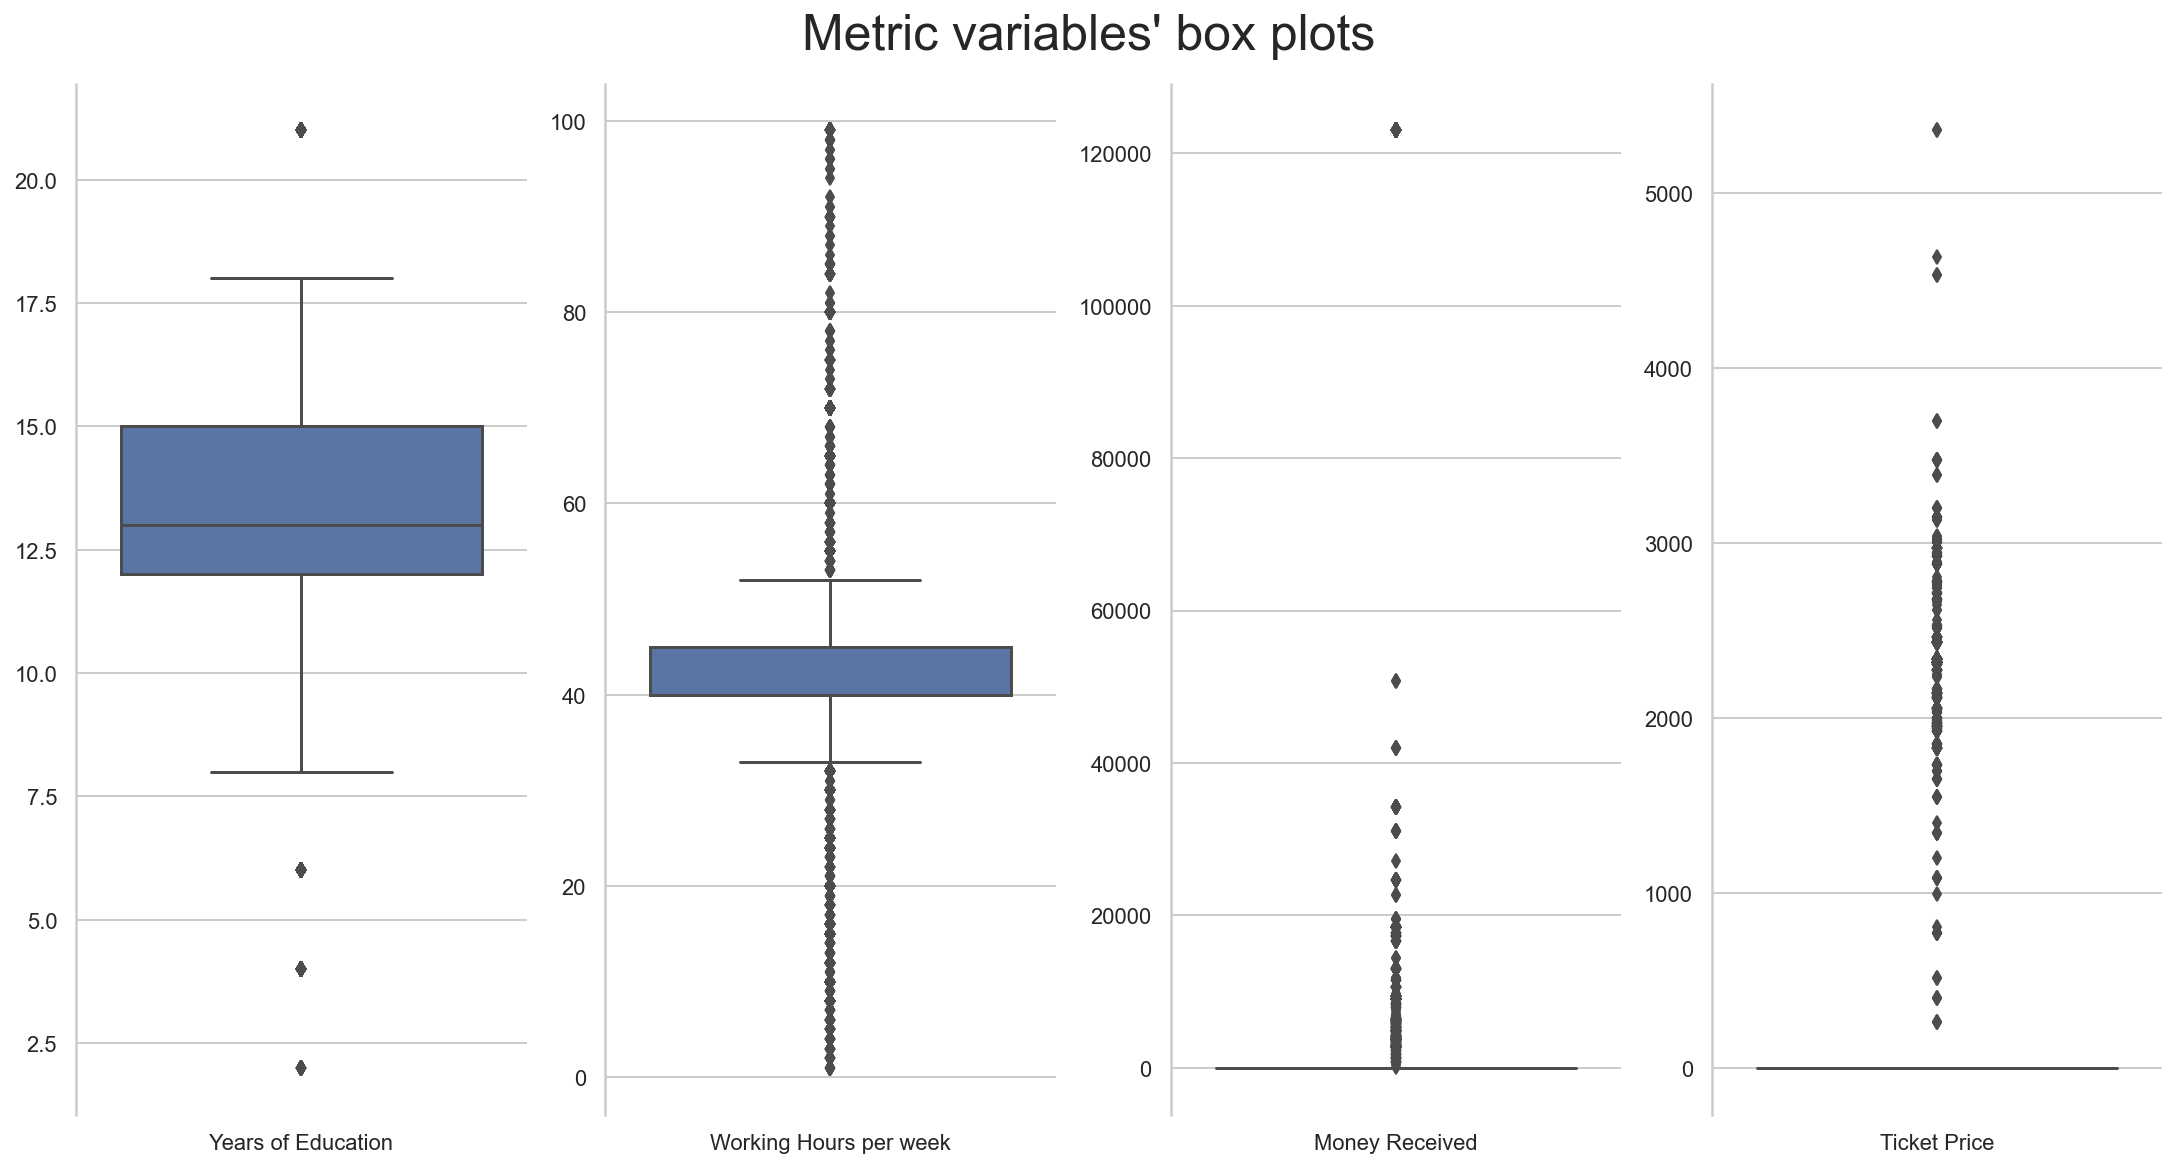

In [70]:
sns.set(style="whitegrid")

data = pd.melt(metric)
plot_features = metric.columns

#Prepare figure layout
fig, axes = plt.subplots(1, len(plot_features), figsize=(15,8), constrained_layout=True)
    
# Draw the boxplots
for i in zip(axes, plot_features):
    sns.boxplot(x="variable", y="value", data=data.loc[data["variable"]==i[1]], ax=i[0])
    i[0].set_xlabel("")
    i[0].set_ylabel("")

# Finalize the plot
plt.suptitle("Metric variables' box plots", fontsize=25)
sns.despine(bottom=True)

plt.show()

In [88]:
list(non_metric.columns)

non_metric.Birthday=non_metric.Birthday.map(lambda x: x.year)
non_metric.drop(columns="Name", inplace=True)

/Users/Mariana/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [131]:
non_metric

,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Employment Sector,Role
CITIZEN_ID,,,,,,,,
12486,2003,Europe,Married,Wife,Northbury,High School + PostGraduation,Private Sector - Services,Repair & constructions
12487,2006,Europe,Married,Wife,Northbury,Professional School,Public Sector - Others,Repair & constructions
12488,2009,Europe,Married,Wife,Northbury,Professional School,Private Sector - Services,Sales
12489,1985,Europe,Married,Wife,Northbury,High School - 2nd Cycle,Private Sector - Services,Security
12490,2015,Europe,Single,Other Family,Northbury,PhD,Self-Employed (Individual),Professor
...,...,...,...,...,...,...,...,...
34881,2023,Europe,Divorced,Children,Northbury,Professional School,Private Sector - Services,Cleaners & Handlers
34882,2025,Europe,Single,Children,Northbury,Professional School,Private Sector - Services,Other services
34883,2022,Europe,Single,Other Family,Northbury,Masters,Public Sector - Others,Professor


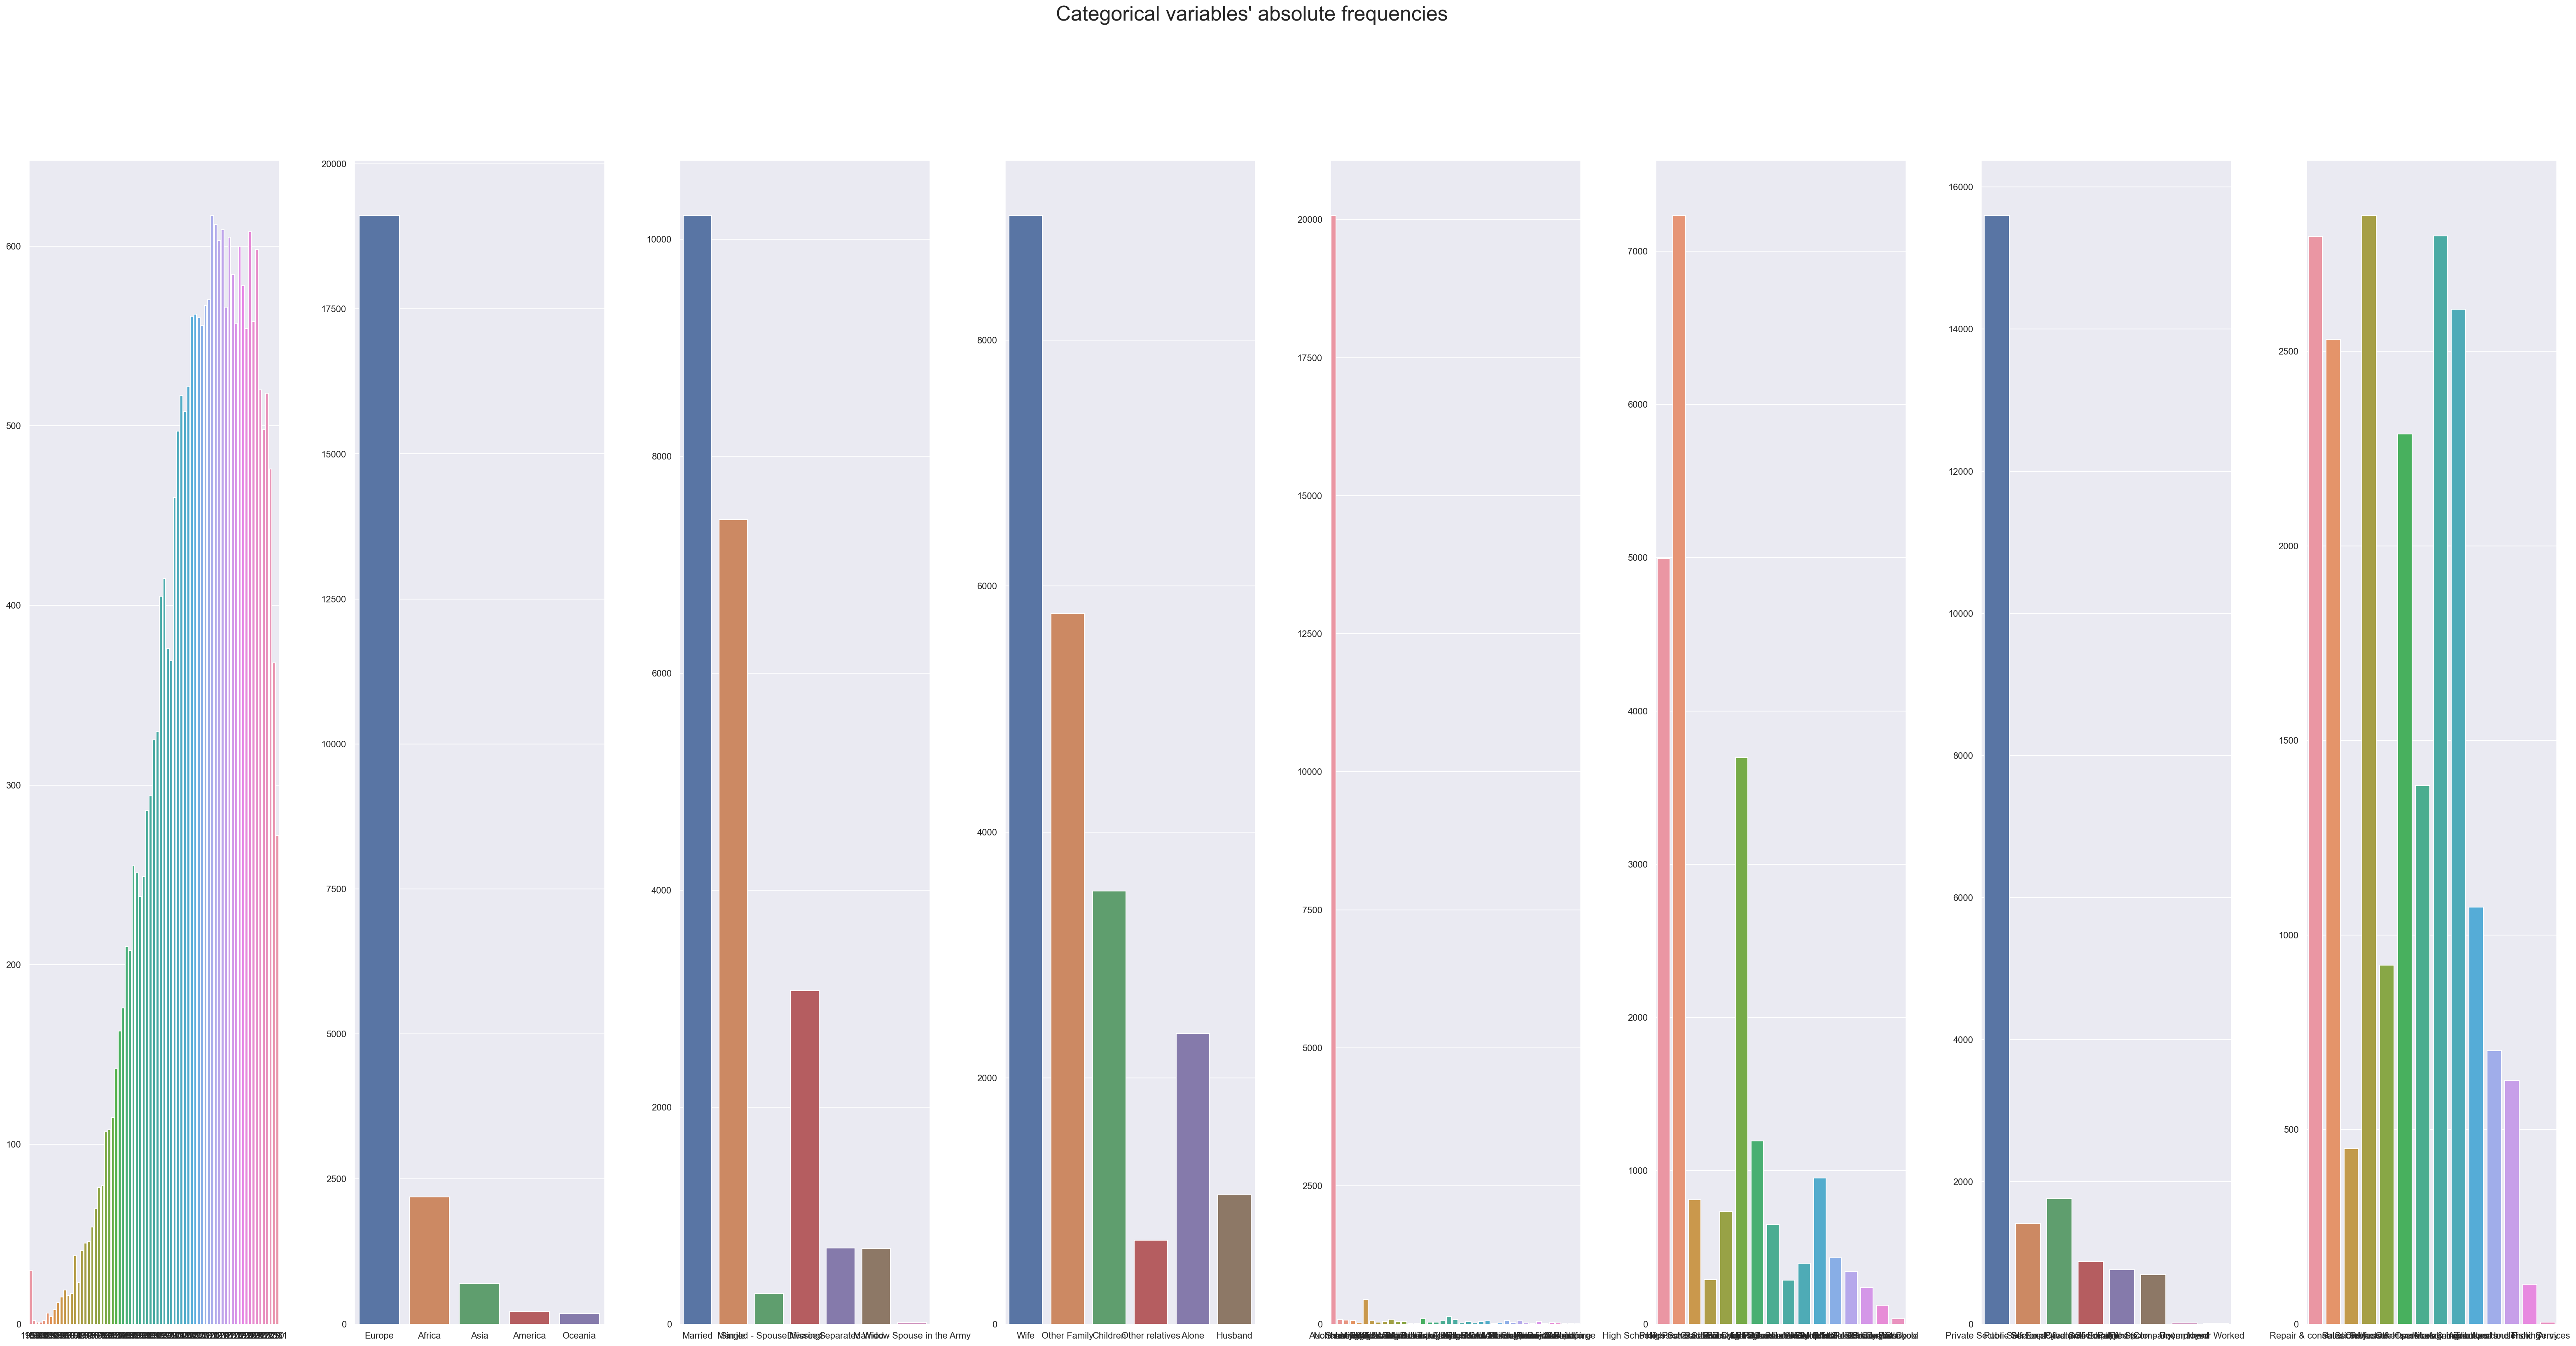

In [123]:
#n func

sns.set()

# figure and axes
#fig, axes = plt.subplots(1, ceil(len(non_metric.columns)/2), figsize=(55,26))
fig, axes = plt.subplots(1, len(non_metric.columns), figsize=(55,26))
#fig, axes = plt.subplots(nrows=2, ncols=ceil(len(non_metric.columns)/2), figsize=(55,26))

for i in zip(axes, non_metric.columns):
    #sns.countplot(non_metric[i[1]], ax=i[0])

    sns.countplot(x=i[1], data=non_metric, ax=i[0])
    i[0].set_xlabel("")
    i[0].set_ylabel("")

plt.subplots_adjust(wspace=0.3)
plt.suptitle("Categorical variables' absolute frequencies", fontsize=25)

plt.show()

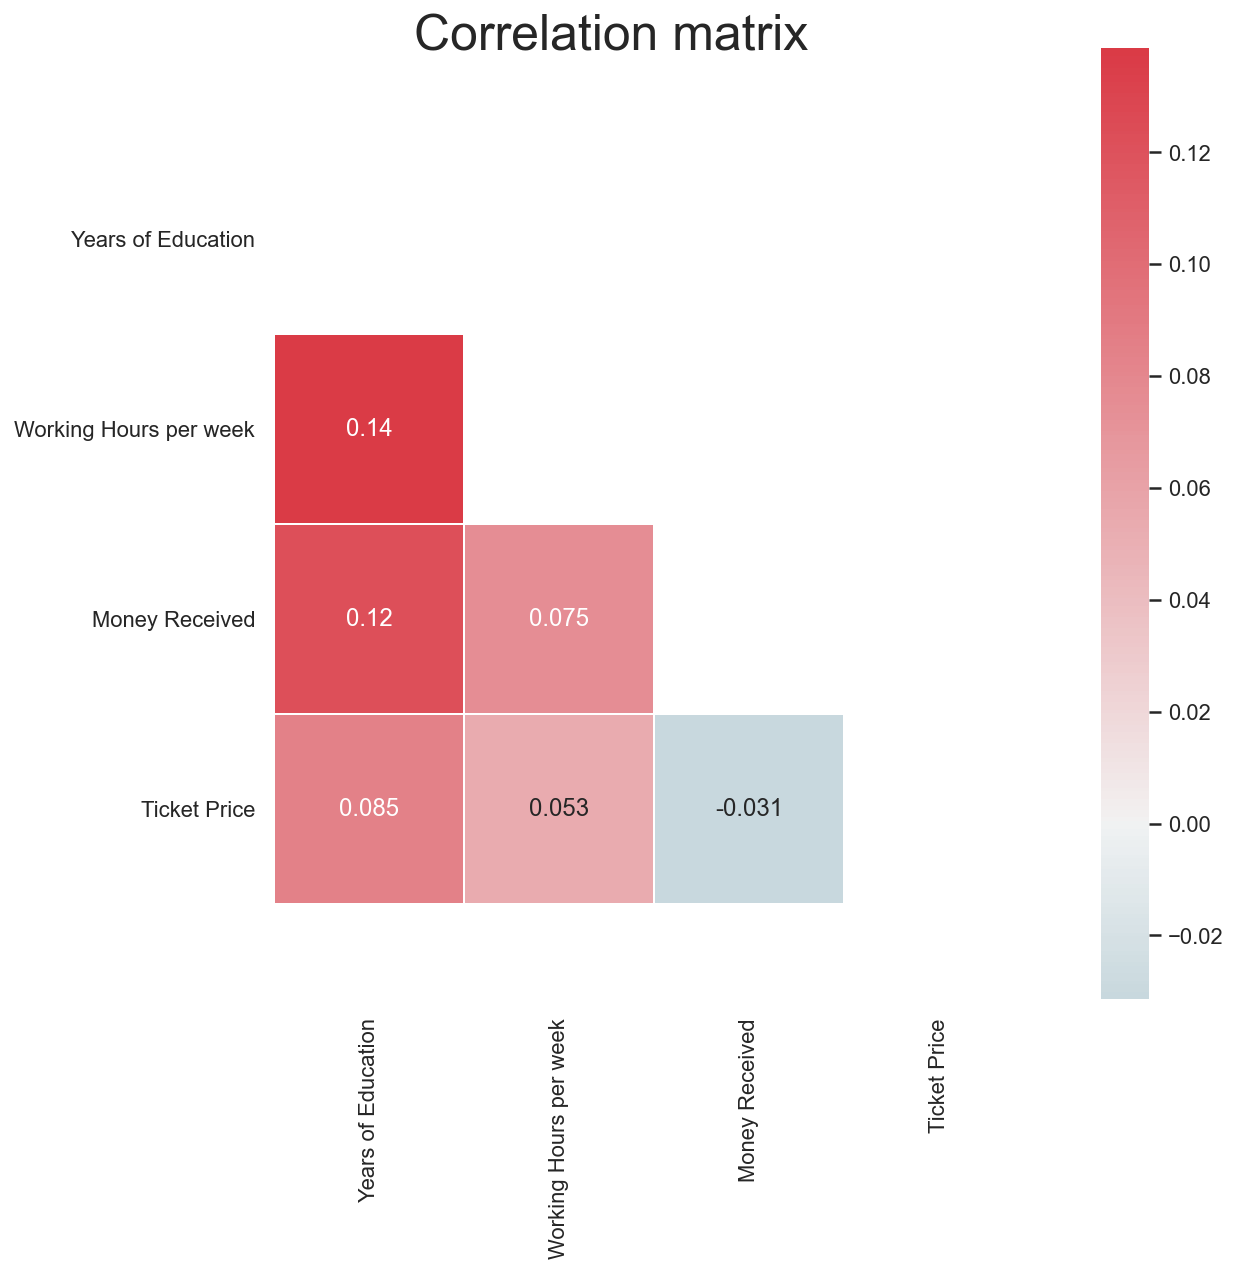

In [135]:
#inutil mas func
sns.set(style="white")

# Compute the correlation matrix
corr = metric.corr() #Getting correlation of numerical variables

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool) #Return an array of zeros (Falses) with the same shape and type as a given array
mask[np.triu_indices_from(mask)] = True #The upper-triangle array is now composed by True values

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True) #Make a diverging palette between two HUSL colors. Return a matplotlib colormap object.

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, ax=ax, annot=True)

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Correlation matrix", fontsize=25)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
# Fixing the bug of partially cut-off bottom and top cells
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.show()

In [138]:
non_metric.Birthday.max()

2031

In [139]:
non_metric.Birthday.min()

1958

In [143]:
df_train["Money Received"].min()

0

In [145]:
df_train["Ticket Price"].min()

0

In [155]:
df_train[(df_train["Ticket Price"]!=0) & (df_train["Money Received"]!=0)]

,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price
CITIZEN_ID,,,,,,,,,,,,,


In [163]:
df_train.groupby(["Education Level","Years of Education"] )["Years of Education"].mean()

Education Level                       Years of Education
Bachelors                             15                    15
Bachelors + PostGraduation            16                    16
High School + PostGraduation          13                    13
High School - 1st Cycle               10                    10
High School - 2nd Cycle               11                    11
High School Complete                  12                    12
Masters                               17                    17
Masters + PostGraduation              18                    18
Middle School - 1st Cycle             6                      6
Middle School - 2nd Cycle             8                      8
Middle School Complete                9                      9
PhD                                   21                    21
Preschool                             2                      2
Primary School                        4                      4
Professional School                   12                    1

In [167]:
df_train[(df_train["Lives with"]=="Wife") & (df_train["Marital Status"]!="Married")]

,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price
CITIZEN_ID,,,,,,,,,,,,,
16191,Mr. Boris Allan,2008-04-10,Europe,Married - Spouse in the Army,Wife,Northbury,Bachelors + PostGraduation,16,Self-Employed (Individual),Professor,50,8977,0
22278,Mr. Keith Lewis,2021-04-13,Europe,Married - Spouse in the Army,Wife,Northbury,Professional School,12,Private Sector - Services,Repair & constructions,40,0,0
27110,Mr. Jonathan Kerr,2019-09-02,Europe,Married - Spouse in the Army,Wife,Northbury,Professional School + PostGraduation,13,Private Sector - Services,Agriculture and Fishing,44,0,0
34122,Mr. Kevin Carr,2019-04-28,Europe,Married - Spouse in the Army,Wife,Northbury,Bachelors + PostGraduation,16,Public Sector - Government,Professor,50,0,0
34530,Mr. William Gray,2022-04-04,Europe,Married - Spouse in the Army,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,55,0,0


In [168]:
df_train.groupby(["Marital Status","Lives with"] )["Lives with"].count()

Marital Status                Lives with     
Divorced                      Alone              1113
                              Children            227
                              Other Family       1657
                              Other relatives      75
Married                       Children             73
                              Husband            1042
                              Other Family         12
                              Other relatives      85
                              Wife               9007
Married - Spouse Missing      Alone                85
                              Children             33
                              Other Family        141
                              Other relatives      25
Married - Spouse in the Army  Children              1
                              Husband               7
                              Other relatives       1
                              Wife                  5
Separated                     Alone 

In [175]:
df_train["Age"]=df_train.Birthday.map(lambda x: 2048-x.year)

In [191]:
df_train[(df_train["Age"]<df_train["Years of Education"]+5)]

,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Age
CITIZEN_ID,,,,,,,,,,,,,,
14941,Miss Yvonne Henderson,2029-03-25,Africa,Single,Children,Lanercost,Bachelors + PostGraduation,16,NaN,NaN,40,0,0,19
16528,Miss Ava Glover,2028-07-15,Africa,Single,Other relatives,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Sales,30,0,0,20
24242,Miss Pippa Anderson,2024-02-01,Europe,Single,Other Family,Fool's March,PhD,21,Private Sector - Others,Professor,99,0,0,24
24843,Mr. Gavin Thomson,2028-09-13,Europe,Single,Children,Northbury,Masters,17,Private Sector - Services,Management,25,0,0,20
27833,Miss Sue Randall,2030-04-08,Europe,Single,Children,Northbury,Masters,17,Public Sector - Others,Professor,60,0,0,18
28849,Mr. Jonathan Oliver,2031-02-05,Europe,Single,Children,Northbury,High School + PostGraduation,13,Private Sector - Services,Administratives,20,0,0,17
33939,Mr. Isaac Alsop,2027-04-20,Europe,Single,Children,Northbury,Masters,17,Private Sector - Others,Transports,15,0,0,21


In [202]:
df_train[df_train["Years of Education"]==2]

,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Age
CITIZEN_ID,,,,,,,,,,,,,,
13008,Mr. Isaac Rampling,2023-08-09,Europe,Single,Other Family,Fanfoss,Preschool,2,Private Sector - Services,Agriculture and Fishing,35,0,0,25
14801,Mr. Stewart Piper,1994-06-09,Asia,Married,Wife,Sharnwick,Preschool,2,Private Sector - Services,Repair & constructions,40,0,0,54
15773,Mr. Julian Greene,2008-08-15,Europe,Married,Wife,Fanfoss,Preschool,2,Private Sector - Services,Other services,40,0,2057,40
16989,Miss Elizabeth Butler,2024-05-29,Europe,Single,Children,Northbury,Preschool,2,Private Sector - Services,Machine Operators & Inspectors,30,0,0,24
17052,Mrs. Bella Davidson,2000-09-14,Europe,Separated,Alone,Auchenshuggle,Preschool,2,Private Sector - Services,Other services,40,0,0,48
17344,Mr. Adrian Chapman,2022-08-13,Europe,Married - Spouse Missing,Other Family,Fanfoss,Preschool,2,Private Sector - Services,Machine Operators & Inspectors,40,0,2114,26
17626,Mr. Julian Scott,2029-04-19,Europe,Single,Other Family,MillerVille,Preschool,2,Private Sector - Services,Agriculture and Fishing,36,0,0,19
18822,Miss Carolyn Rees,1995-04-17,Europe,Single,Other Family,Northbury,Preschool,2,Public Sector - Others,Machine Operators & Inspectors,35,0,0,53
19274,Mr. Jack Sutherland,1985-07-09,Oceania,Married,Wife,Fanfoss,Preschool,2,Private Sector - Services,Professor,30,0,0,63


In [209]:
pd.set_option('display.max_rows', 500)
df_train.groupby(["Base Area","Role"])["Role"].count()

Base Area      Role                          
Aberuthven     Administratives                      5
               Cleaners & Handlers                  3
               Household Services                   1
               IT                                   1
               Machine Operators & Inspectors       4
               Other services                       2
               Professor                            1
               Repair & constructions               4
               Sales                                2
Aerilon        Administratives                      2
               Agriculture and Fishing              1
               Cleaners & Handlers                  6
               Household Services                   1
               IT                                   2
               Machine Operators & Inspectors       6
               Management                           3
               Other services                       1
               Professor            

In [210]:
data_crosstab = pd.crosstab(df_train['Base Area'], 

                            df_train['Role'],  

                               margins = False)

In [211]:
data_crosstab

Role,Administratives,Agriculture and Fishing,Army,Cleaners & Handlers,Household Services,IT,Machine Operators & Inspectors,Management,Other services,Professor,Repair & constructions,Sales,Security,Transports
Base Area,,,,,,,,,,,,,,
Aberuthven,5,0,0,3,1,1,4,0,2,1,4,2,0,0
Aerilon,2,1,0,6,1,2,6,3,1,6,9,3,0,3
Alverton,28,3,0,4,1,9,10,9,22,19,6,13,2,1
Aroonshire,7,1,0,3,1,0,6,14,8,7,4,6,0,6
Auchenshuggle,3,2,0,7,5,0,4,2,29,4,14,5,0,3
Bellenau,0,0,0,0,0,0,2,3,0,2,0,0,1,0
Bellmoral,6,0,0,2,1,1,6,2,5,3,8,2,0,2
Butterpond,14,0,0,4,0,1,5,12,3,26,9,9,4,3
Carlisle,4,0,0,0,0,2,2,1,3,1,2,1,0,1


In [219]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=500)
clf.fit_predict(metric)

clf.negative_outlier_factor_

array([-0.97147836, -1.        , -0.99085907, ..., -1.09964061,
       -1.87086085, -1.        ])